In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal
import scipy
from scipy.io.wavfile import read

In [ ]:
#converting mp3 to wav
from os import path, listdir
from pydub import AudioSegment
import glob 
from pathlib import Path

# files
directory = "Tatsuro Yamashita - [1982] FOR YOU (320k)"
mp3s =[]
for file in listdir(directory):
    if file.endswith(".mp3"):
        mp3s.append(file)

for mp3 in mp3s:
    src = f"{directory}/{mp3}"
    name = Path(mp3).stem
    dst = f"wav_files/{name}.wav"
                                            
    # # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")

/Users/macbook/miniconda3/envs/py39/lib/python3.9/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ffprobe'

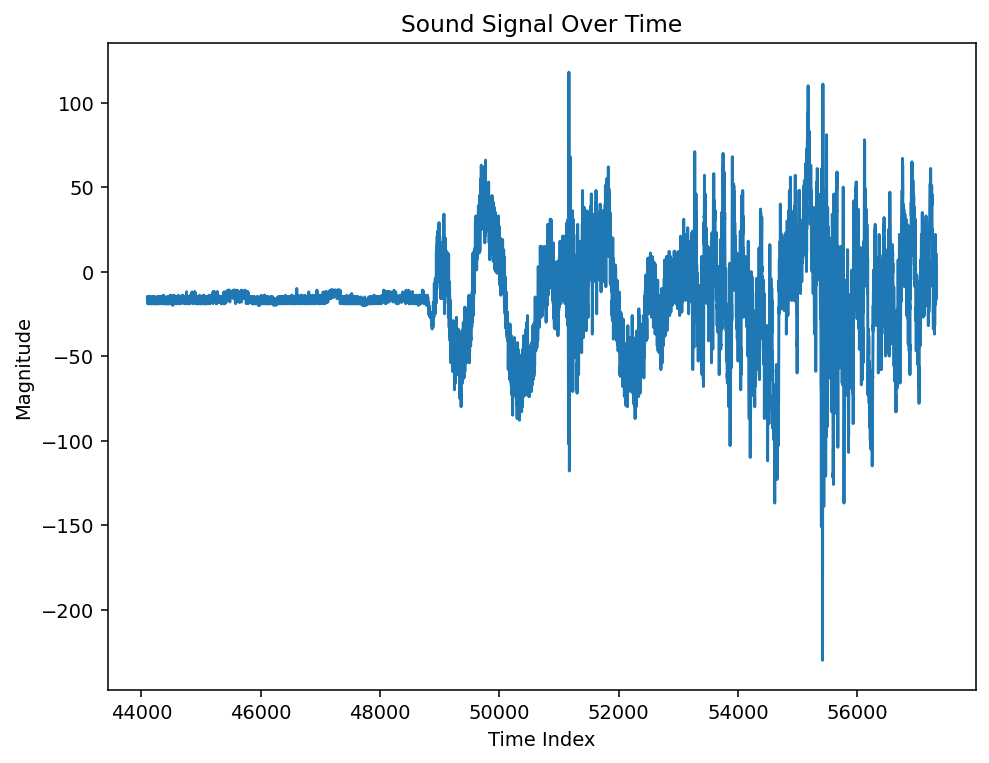

In [22]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 140 # 200 e.g. is really fine, but slower

# Read the input WAV files
# Fs is the sampling frequency of the file
Fs, song = read("wav_files/01. Sparkle.wav")

time_to_plot = np.arange(Fs * 1, Fs * 1.3, dtype=int)
plt.plot(time_to_plot, song[time_to_plot][:, 0])
plt.title("Sound Signal Over Time")
plt.xlabel("Time Index")
plt.ylabel("Magnitude");

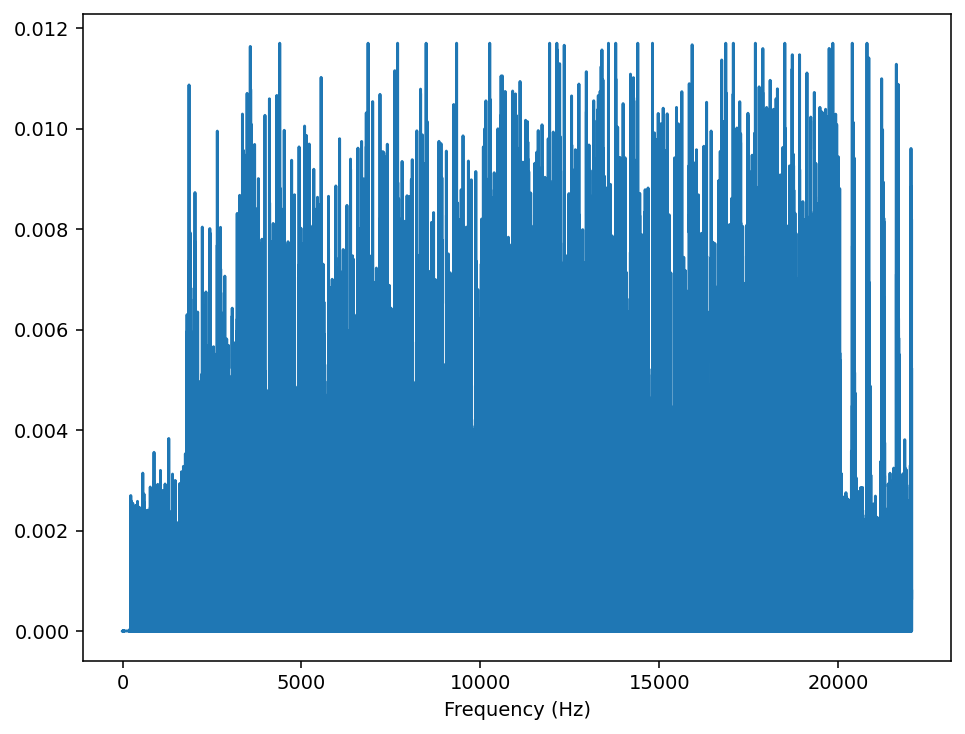

In [23]:
#fourier transform 
from scipy.fft import fft, fftfreq

N = len(song)
fft = scipy.fft.fft(song)
transform_y = 2.0 / N * np.abs(fft[0:N//2])
transform_x = scipy.fft.fftfreq(N, 1 / Fs)[:N//2]
plt.plot(transform_x, transform_y[:, 0])
plt.xlabel("Frequency (Hz)");

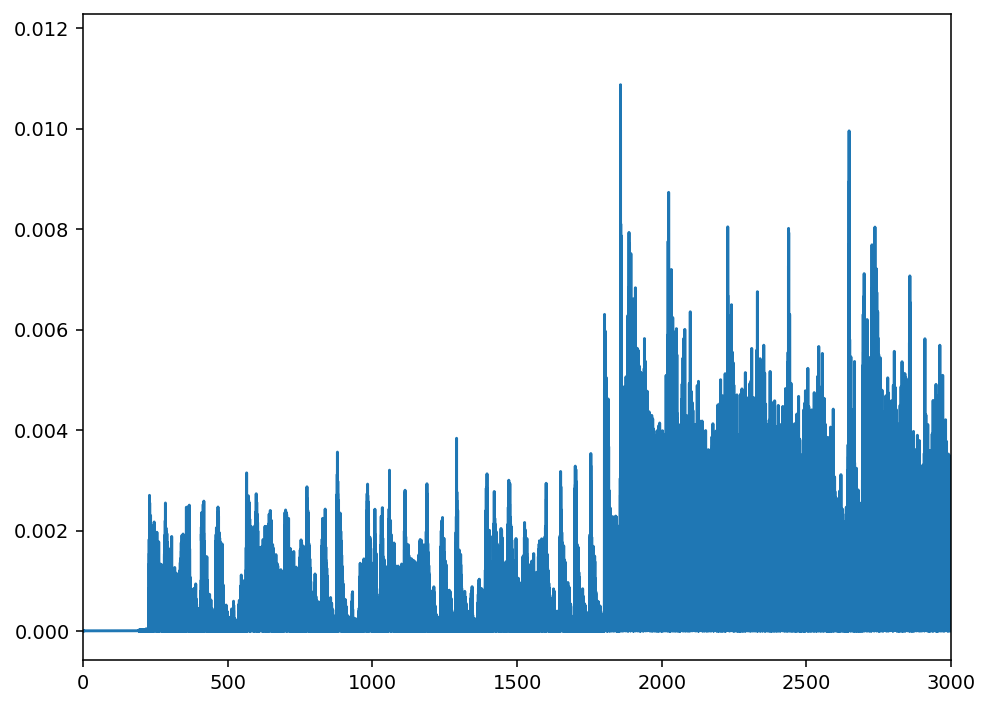

In [28]:
all_peaks, props = signal.find_peaks(transform_y[:, 0])

peaks, props = signal.find_peaks(transform_y[:, 0], prominence=0, distance=10000)
n_peaks = 15

# Get the n_peaks largest peaks from the prominences
# This is an argpartition
# Useful explanation: https://kanoki.org/2020/01/14/find-k-smallest-and-largest-values-and-its-indices-in-a-numpy-array/
largest_peaks_indices = np.argpartition(props["prominences"], -n_peaks)[-n_peaks:]
largest_peaks = peaks[largest_peaks_indices]

plt.plot(transform_x, transform_y[:, 0], label="Spectrum")
plt.scatter(transform_x[largest_peaks], transform_y[:, 0][largest_peaks], color="r", zorder=10, label="Constrained Peaks")
plt.xlim(0, 3000)

plt.show()